In [1]:
import tensorflow.keras as keras
import tensorflow as tf
import nibabel as nib
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# mentioning the data path
Training_data_path=r"C:\Users\saili\Downloads\archive\BraTS2021_Training_Data"

In [3]:
# getting the sub directories
subdirectories = [d for d in os.listdir(r"C:\Users\saili\Downloads\archive\BraTS2021_Training_Data") if os.path.isdir(os.path.join(r"C:\Users\saili\Downloads\archive\BraTS2021_Training_Data", d))]
subdirectories.sort()
print(len(subdirectories))

1251


In [4]:
#paths for first batch images
datapath="C:\\Users\\saili\\Downloads\\archive\\BraTS2021_Training_Data\\"+subdirectories[0]
print(f"batch one datapath:",datapath,"\n")
batch_data_paths=[os.path.join(datapath, filename) for filename in os.listdir(datapath) if filename.endswith('.nii.gz')]
batch_data_paths.sort() 
feature=batch_data_paths.pop(1) #popping the feature image
i=0
for path in batch_data_paths:
    print(f"modality {i+1} path:  ",path)
    i+=1

batch one datapath: C:\Users\saili\Downloads\archive\BraTS2021_Training_Data\BraTS2021_00000 

modality 1 path:   C:\Users\saili\Downloads\archive\BraTS2021_Training_Data\BraTS2021_00000\BraTS2021_00000_flair.nii.gz
modality 2 path:   C:\Users\saili\Downloads\archive\BraTS2021_Training_Data\BraTS2021_00000\BraTS2021_00000_t1.nii.gz
modality 3 path:   C:\Users\saili\Downloads\archive\BraTS2021_Training_Data\BraTS2021_00000\BraTS2021_00000_t1ce.nii.gz
modality 4 path:   C:\Users\saili\Downloads\archive\BraTS2021_Training_Data\BraTS2021_00000\BraTS2021_00000_t2.nii.gz


(240, 240, 155)
[0. 1. 2. 4.]


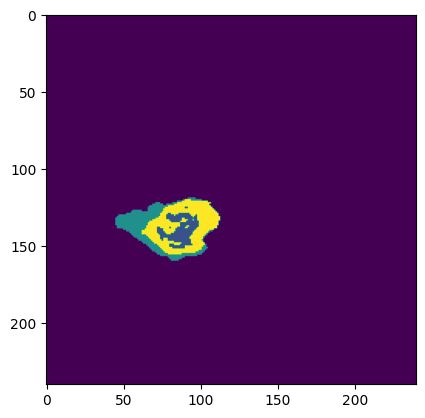

In [5]:
#segmented image for first batch i.e lable for first batch
seg_image=nib.load(feature).get_fdata()
print(seg_image.shape)
print(np.unique(seg_image))
plt.imshow(seg_image[:,:,80])
plt.show()

In [25]:
#getting the np array of the images
images=[nib.load(image_path).get_fdata() for image_path in batch_data_paths]
images[0].shape

(240, 240, 155)

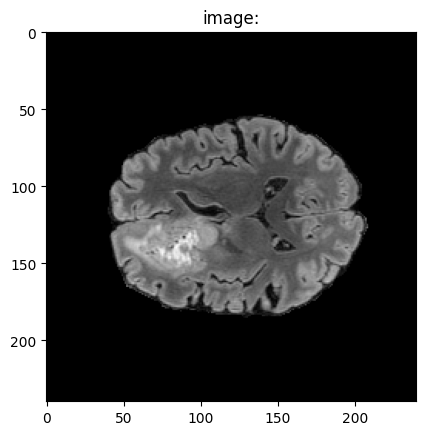

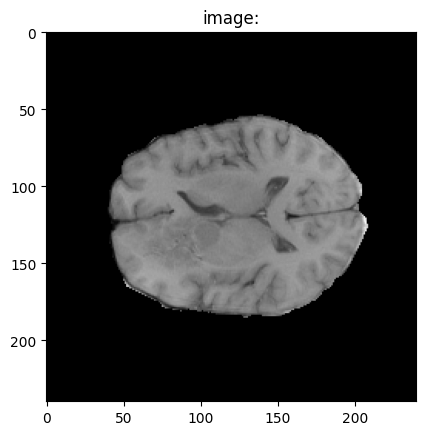

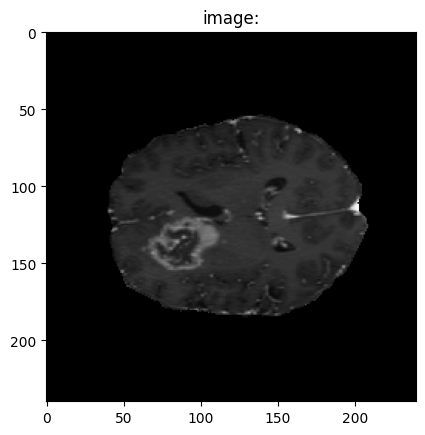

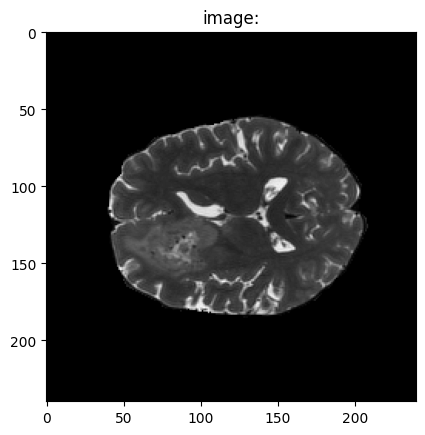

In [7]:
for image in images:
    plt.imshow(image[:,:,80],cmap="grey")
    plt.title("image:")
    plt.show()

In [8]:
#function for plotting the images
def plotting_images(processed_data_per_image):
    fig, axs = plt.subplots(1, len(processed_data_per_image), figsize=(10,10))
    for i, data in enumerate(processed_data_per_image):
        data = data[0, 0, :, :, 0]
        axs[i].imshow(data, cmap='gray')
        axs[i].set_title(f"modality {i+1}")
    plt.show()

In [9]:
#function for concatnating the 4 modalities features
def concatnate(processed_data_per_image):
    concatnate=keras.layers.Concatenate(axis=-1)(processed_data_per_image)
    return concatnate

In [10]:
def passthrough(prev_concatna,processed_data_per_image):
    result=[]
    for image in processed_data_per_image:
        images=[prev_concatna,image]
        concatnate=keras.layers.Concatenate(axis=-1)(images)
        result.append(concatnate)
    return result

In [11]:
def imageReshape(inputs):
    inputData=[]
    for image in images:
        image_data=image.astype("float32")
        image_data = np.reshape(image, (1,1, 240, 240, 155))
        inputData.append(image_data)
    return inputData

In [ ]:
def getTrainingDataDirectories():

    train_x1=[]
    train_x2=[]
    train_x3=[]
    train_x4=[]
    label=[]
    val_x1=[]
    val_x2=[]
    val_x3=[]
    val_x4=[]
    validlabel=[]
    for i in range(len(subdirectories)):

        path=Training_data_path+"/"+subdirectories[1]

        batch_data_paths=[os.path.join(path, filename) for filename in os. listdir (path) if filename.endswith('.nii.gz')]

        batch_data_paths.sort()

        feature=batch_data_paths.pop (1)

        if 1<=1000:

            train_x1.append(batch_data_paths[8])

            train_x2.append(batch_data_paths[1])

            train_x3.append(batch_data_paths[2])

            train_x4.append(batch_data_paths[3])

            label.append(feature)

        else:

            val_x1.append(batch_data_paths[0])

            val_x2.append(batch_data_paths[1])

            val_x3.append(batch_data_paths[2])

            val_x4.append(batch_data_paths[3])

            validlabel.append(feature)

    return [train_x1, train_x2, train_x3, train_x4, label, val_x1, val_x2, val_x3, val_x4, validlabel]

train_x1,train_x2, train_x3,train_x4,label,val_x1,val_x2,val_x3,val_x4, validlabel=getTrainingDataDirectories()
train_x1.sort()
train_x2.sort()
train_x3.sort()
train_x4.sort()
label.sort()

In [ ]:
i=0
for img in range(len(train_x1)):
    print('Now processing image and masks no: ', img)
    try:
        temp_image_flair=nib.load(train_x1[img]).get_fdata()
        temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape) 
        temp_image_t1 = scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)
        temp_image_tice = nib.load(train_x3[img]).get_fdata()
        temp_image_tice = scaler.fit_transform(temp_image_tice.reshape(-1,temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
        temp_image_t2 = nib.load(train_x4[img]).get_fdata()
        temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
        temp_mask = nib.load(label[img]).get_fdata()
        temp_mask = temp_mask.astype(np.uint8)
        temp_mask[temp_mask == 4] = 3
        temp_combined_images = np.stack([temp_image_flair, temp_image_t1, temp_image_tice, temp_image_t2], axis=3) 
        temp_combined_images =temp_combined_images [56:184, 56:184, 13:141]
        temp_mask = temp_mask [56:184, 56:184, 13:141]


        val, counts = np.unique(temp_mask, return_counts=True) 
        print (f"Stack shape: {temp_combined_images.shape}") 
        print (f"mask shape {temp_mask.shape}")
        if (1 (counts[0] / counts.sum())) > 0.01:
            temp_mask=to_categorical(temp_mask, num_classes=4) 
            np.save(f'/content/train/image_{i}.npy', temp_combined_images) 
            np.save(f'/content/mask/image_{i}.npy', temp_mask)
            print("Saved")
        #remove_directory (f'/content/training/{subdirectories[i]}')
            i+=1
        else:
            print("Not saved")
    except Exception as e:
        print (f"Error processing image {img}: {str(e)}")
        # Remove the directories and their contents
        remove_directory('/content/training'+f'/{subdirectories[img]}')
        print("Directory removed.")
        continue

In [ ]:

def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list): 
        if(image_name.split('.')[1] == 'npy'):
            image=np.load(img_dir + image_name)
            images.append(image)
        images=np.array(images)
        return images
def imageLoader (img_dir, img_list, mask_dir, mask_list, batch_size=1):
    L = len(img_list)
    # keras needs the generator infinite, so use while True
    while True:
        batch_start = 0
        batch_end = batch_size
        while batch_start < L:
            limit = min(batch_end, L)
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list [batch_start:limit])
            yield (X, Y) # a tuple with two numpy arrays with batch_size samples
            batch_start = batch_size
            batch_end += batch_size

train_img_dir = '/content/train/'
train_mask_dir ='/content/mask/'
train_img_list = os.listdir(train_img_dir)
train_img_list.sort()
train_mask_list = os.listdir(train_mask_dir)
train_mask_list.sort()
batch_size=1
train_img_datagen = imageLoader(train_img_dir, train_img_list,
train_mask_dir, train_mask_list, batch_size)
img, msk = train_img_datagen.__next__()
img_num = random.randint(0, img.shape[0]-1)
test_img = img[img_num]
test_mask = msk[img_num]
test_mask = np.argmax(test_mask, axis=3)
n_slice=random.randint(0, test_mask.shape[2])
print(test_img.shape)
(128, 128, 128, 4)

In [ ]:
def initConvolution(inputs):
    convolution=tf.keras.layers.Conv3D(32,kernel_size=3,padding="same")(inputs)
    convolution=tf.keras.layers.BatchNormalization()(convolution)
    return convolution

In [40]:
def enblock(inputs,filters):
    convolution=tf.keras.layers.BatchNormalization()(inputs)
    convolution=tf.keras.layers.Activation("relu")(convolution)
    convolution=tf.keras.layers.Conv3D(filters=filters,kernel_size=3,padding="same")(convolution)
    convolution=tf.keras.layers.BatchNormalization()(inputs)
    convolution=tf.keras.layers.Activation("relu")(convolution)
    convolution=tf.keras.layers.Conv3D(filters=filters,kernel_size=3,padding="same")(convolution)
    downsample=tf.keras.layers.MaxPooling3D(pool_size=2,strides=2,padding="same")(convolution)
    return downsample

In [45]:

def deBlock (inputs, filters):
    convolution=tf.keras. layers.Conv3D (filters-filters, kernel_size=3, padding="same") (inputs)
    convolution=tf.keras.layers. Activation ("relu") (convolution) 
    convolution=tf.keras.layers.BatchNormalization() (inputs)
    convolution=tf.keras.layers.Conv3D (filters=filters, kernel_size=3, padding="same") (convolution)
    convolution=tf.keras.layers.Activation ("relu") (convolution) 
    convolution=tf.keras.layers.BatchNormalization() (inputs)
    return convolution


In [ ]:
def deCatUp(upsample, filters, filters1):
    result=tf.keras.layers.Conv3D (filters-filters, kernel_size=3, padding="same") (upsample)
    result=tf.keras.layers.Conv3DTranspose(filters-filters, kernel_size=3, padding="same") (result) 
    result=tf.keras.layers.Conv3D (filters-filters1, kernel_size=3, padding="same") (upsample) 
    return result

In [ ]:

def buildModel(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)
    print(inputs.shape)
    x1, x2, x3,x4= tf.split(inputs, num_or_size_splits=4, axis=-1) 
    input_list=[x1,x2,x3,x4]
    print(x1.shape)
    #initial convolution
    initial_convolution_list=[]
    for input_image in input_list: 
        x=initConvolution(input_image) 
        initial_convolution_list.append(x)
    #encoder block
    encode_1=[]
    for input_image in initial_convolution_list:
        x=enBlock(input_image, 16, True) 
        encode_1.append(x)
        concat_1=tf.keras.layers.concatenate (encode_1,axis=-1)
    skip_1=[]
    for image in encode_1:
        x=tf.keras.layers.concatenate([concat_1,image], axis=-1)
        skip_1.append(x)
    del encode_1
    print(concat_1.shape)

    encode_2=[]
    for input_image in skip_1:
        x=enblock(input_image, 32, True)
        encode_2.append(x)
    concat_2=tf.keras.layers.concatenate (encode_2,axis=-1)
    skip_2=[]
    for image in encode_2:
        x=tf.keras.layers.concatenate([concat_2,image], axis=-1)
        skip_2.append(x)
    del encode_2
    print(concat_2.shape)

    encode_3=[]
    for input_image in skip_2:
        x=enblock(input_image, 64, True)
        encode_3.append(x)
    concat_3=tf.keras.layers.concatenate (encode_3,axis=-1)
    skip_3=[]
    for image in encode_3:
        x=tf.keras.layers.concatenate([concat_3, image], axis=-1)
        skip_3.append(x)
    del encode_3
    print(concat_3.shape)

    encode_4=[]
    for input_image in skip_3: 
        x=enblock(input_image,128, True)
        encode_4.append(x)
    concat_4=tf.keras.layers.concatenate (encode_4, axis=-1)
    print (concat_4. shape)

    skip_4=[]
    for image in encode_4:
        x=tf.keras.layers.concatenate([concat_4,image], axis=-1)
        skip_4.append(x)
    del encode_4
    initiate_up1=[]
    for image in skip_4:
        x=initConvolution (image)
        initiate_up1.append(x)
    up_1=tf.keras.layers.Concatenate (axis=-1) (initiate_up1)
    up_1=enBlock(up_1,256)
    up_1=deBlock(up_1,256)
    up_1=deCatUp(up_1,512,128)
    up_1=tf.keras.layers. UpSampling3D (size=(2, 2, 2)) (up_1)
    print (up_1.shape)
    del initiate_up1

    initiate_up2=[] 
    for image in skip_3:
        x=initConvolution (image)
        initiate_up2.append(x)
    up_2=tf.keras.layers.Concatenate (axis=-1) ([*initiate_up2]) 
    up_2=tf.keras.layers.Concatenate (axis=-1) ([up_2,up_1])
    up_2=deCatUp(up_2,256,128)
    up_2=deBlock(up_2,72)
    up_2=tf.keras.layers. UpSampling3D(size=(2, 2, 2)) (up_2)
    del initiate_up2 
    print(up_2.shape)
    initiate_up3=[]
    for image in skip_2:
        x=initConvolution (image)
        initiate_up3.append(x)
    up_3=tf.keras.layers.Concatenate (axis=-1) ([*initiate_up3,up_2]) 
    up_3=deCatUp(up_3,128,164)
    up_3=deBlock(up_3,36)
    up_3=tf.keras.layers. UpSampling3D(size=(2, 2, 2)) (up_3)
    del initiate_up3 
    print(up_3.shape)
    initiate_up4=[]
    for image in skip_1:
        x=initConvolution (image)
        initiate_up4.append(x)
    up_4=tf.keras.layers.Concatenate (axis=-1) ([*initiate_up4,up_3])
    up_4=deCatUp(up_4,164,72)
    up_4=deBlock(up_4,64)
    up_4=tf.keras.layers. UpSampling3D(size=(2, 2, 2))(up_4)
    del initiate_up4 
    print (up_4. shape)

    initiate_up5=[]
    for image in initial_convolution_list:
        x=initConvolution (image)
        initiate_up5.append(x)
    up_5=tf.keras.layers.Concatenate (axis=-1) (initiate_up5)
    up_5=tf.keras.layers.Concatenate (axis=-1) ([up_5,up_4])
    up_5=tf.keras.layers.Conv3D(4, kernel_size=3, padding='same', kernel_regularizer=12_reg)(up_5)
    print(up_5.shape)

    del initiate_up5
    model=tf.keras. Model (inputs-inputs, outputs=up_5)
    
    return model
model=buildModel((128,128,128,4))

In [ ]:
def deBlock(inputs, filters):

    convolution=tf.keras.layers.Conv3D(filters-filters, kernel_size=3, padding="same") (inputs)
    convolution=tf.keras.layers.Activation("relu") (convolution)
    convolution=tf.keras.layers.BatchNormalization()(inputs)
    convolution=tf.keras.layers.Conv3D (filters=filters, kernel_size=3, padding="same") (convolution)
    convolution=tf.keras.layers.Activation("relu") (convolution)
    convolution=tf.keras.layers.BatchNormalization()(inputs)
    return convolution

In [ ]:
#decoder
initiate_up1=[]
for image in skip_4:
    x=initConvolution (image)
initiate_up1.append(x)
up_1=tf.keras.layers.Concatenate (axis=-1) (initiate_up1)
up_1=enBlock (up_1,256) 
up_1=deBlock (up_1,256) 
up_1=deCatUp(up_1,512,256)
up_1=tf.keras.layers. UpSampling3D (size=(1, 2, 2)) (up_1) 
del initiate_up1

initiate_up2=[]
for image in skip_3:
    x=initConvolution (image) 
    initiate_up2.append(x)
up_2=tf.keras. layers.Concatenate (axis=-1) (initiate_up2) 
up_2=tf.keras. layers.Concatenate (axis=-1) ([up_2, up_1]) 
up_2=deCatUp (up_2, 256, 128)
up_2=deBlock (up_2,72)
up_2=tf.keras.layers. UpSampling3D (size=(1, 2, 2)) (up_2)
del initiate_up2


initiate_up3=[]
for image in skip_2:
    x=initConvolution (image)
    initiate_up3.append(x)
up_3=tf.keras.layers.Concatenate (axis=-1) (initiate_up3) 
up_3=tf.keras. layers.Concatenate (axis=-1) ([up_3, up_2]) 
up_3=deCatUp (up_3, 128, 164)
up_3=deBlock (up_3,36)
up_3=tf.keras.layers. UpSampling3D (size=(1, 2, 2)) (up_3)
del initiate_up3

initiate_up4=[]
for image in skip_1:
    x=initConvolution(image)
    initiate_up4.append(x)
up_4=tf.keras.layers.Concatenate (axis=-1) (initiate_up4) 
up_4=tf.keras.layers.Concatenate (axis=-1) ([up_4, up_3])
up_4=deCatUp (up_4, 164, 72)
up_4=deBlock (up_4, 64)
up_4=tf.keras.layers. UpSampling3D (size=(1, 2, 2)) (up_4) 
del initiate_up4


initiate_up5=[]
for image in initial_convolution_list:
    x=initConvolution(image)
    initiate_up5.append(x)
up_5=tf.keras.layers.Concatenate (axis=-1) (initiate_up5)
up_5=tf.keras. layers.Concatenate (axis=-1) ([up_5, up_4])
up_5=tf.keras.layers.Conv3D (128, kernel_size=3, padding=' same', activation="softmax") (up_5)
del initiate_up5

In [56]:
# Inside the loop
processed_data_per_image=[]
for image in images:
    image_data=image.astype("int32")
    image = np.reshape(image, (1,1, 240, 240, 155))
    image= tf.convert_to_tensor(image) 
    processed_data_per_image.append(enblock(image,1024))


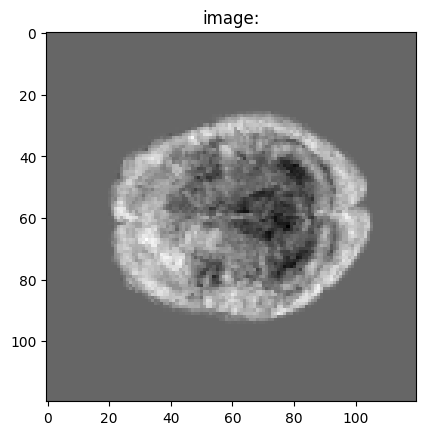

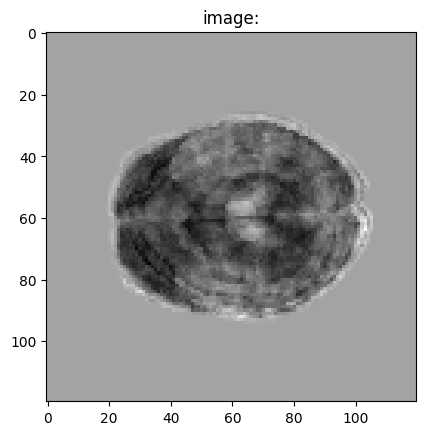

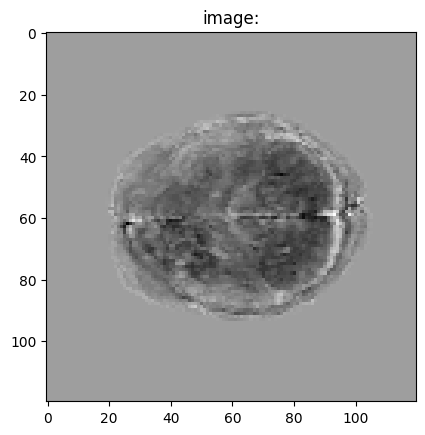

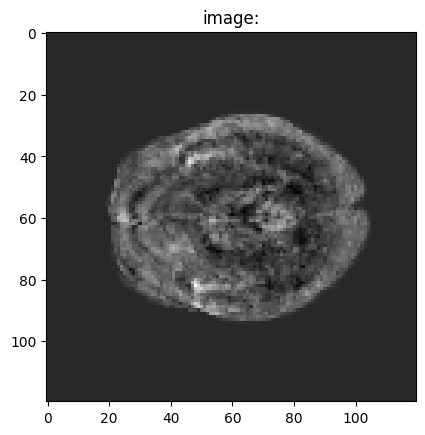

In [57]:
for image in processed_data_per_image:
    plt.imshow(image[0,0,:,:,0],cmap="grey")
    plt.title("image:")
    plt.show()